In [16]:
import pandas as pd
import pandas as pd

bike_hourly_rides = pd.read_csv("E:/dasktop/Uchicago/DEP/final/bike_rides_hourly_counts.csv")
bike_stations = pd.read_csv("E:/dasktop/Uchicago/DEP/final/citi_bike_stations.csv")
time_data = pd.read_csv("E:/dasktop/Uchicago/DEP/final/time.csv")

bike_hourly_rides['start_station_id'] = bike_hourly_rides['start_station_id'].astype(str)
bike_stations['station_id'] = bike_stations['station_id'].astype(str)

merged_bike_data = bike_hourly_rides.merge(bike_stations, left_on='start_station_id', right_on='station_id')

result = merged_bike_data.groupby(['time_id', 'start_station_id', 'station_name', 'latitude', 'longitude'])['total_rides'].max().reset_index()

result = result.sort_values(by="total_rides", ascending=False)

print(result.head())



C:\Users\12916\AppData\Local\Temp\ipykernel_35324\161875249.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_hourly_rides = pd.read_csv("E:/dasktop/Uchicago/DEP/final/bike_rides_hourly_counts.csv")


                time_id start_station_id                   station_name  \
10926469  2023-08-12-11          5207.01        Centre St & Chambers St   
11110036  2023-08-19-11          5207.01        Centre St & Chambers St   
8743356   2023-05-17-17          5470.12  North Moore St & Greenwich St   
10926697  2023-08-12-11          5980.07             E 17 St & Broadway   
3402966   2022-08-20-11          5788.13          Lafayette St & E 8 St   

          latitude  longitude  total_rides  
10926469    40.713    -74.005          165  
11110036    40.713    -74.005          150  
8743356     40.720    -74.011          144  
10926697    40.737    -73.990          142  
3402966     40.730    -73.991          137  


In [17]:
bike_hourly_rides = pd.read_csv("E:/dasktop/Uchicago/DEP/final/hourly_counts.csv")

subway_hourly_rides = pd.read_csv("E:/dasktop/Uchicago/DEP/final/MTA_hourly_rides_new_new.csv")


merged_bike_data = bike_hourly_rides.merge(time_data, on="time_id", how="left")
merged_subway_data = subway_hourly_rides.merge(time_data, on="time_id", how="left")

result = pd.merge(merged_bike_data.groupby(["time_id", "year", "month", "day", "hour"])["total_rides"].sum().reset_index(), 
                  merged_subway_data.groupby(["time_id", "year", "month", "day", "hour"])["ridership"].sum().reset_index(), 
                  on="time_id", suffixes=('_bike', '_subway'))

print(result.head())

C:\Users\12916\AppData\Local\Temp\ipykernel_35324\2065596195.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_hourly_rides = pd.read_csv("E:/dasktop/Uchicago/DEP/final/MTA_hourly_rides_new_new.csv")


         time_id  year_bike  month_bike  day_bike  hour_bike  total_rides  \
0  2022-03-01-00       2022           3         1          0          256   
1  2022-03-01-01       2022           3         1          1          122   
2  2022-03-01-02       2022           3         1          2           96   
3  2022-03-01-03       2022           3         1          3           68   
4  2022-03-01-04       2022           3         1          4          110   

   year_subway  month_subway  day_subway  hour_subway  ridership  
0       2022.0           3.0         1.0          0.0      15493  
1       2022.0           3.0         1.0          1.0       5289  
2       2022.0           3.0         1.0          2.0       3534  
3       2022.0           3.0         1.0          3.0       4446  
4       2022.0           3.0         1.0          4.0      15484  


In [18]:
weather = pd.read_csv("E:/dasktop/Uchicago/DEP/final/weather.csv")

merged_bike_data = bike_hourly_rides.merge(weather, on="time_id", how="left")
merged_subway_data = subway_hourly_rides.merge(weather, on="time_id", how="left")

result = merged_bike_data.groupby(["temperature", "wind_speed", "precipitation"])["total_rides"].mean().reset_index()
result["avg_subway_ridership"] = merged_subway_data.groupby(["temperature", "wind_speed", "precipitation"])["ridership"].mean().reset_index()["ridership"]

print(result.head())

   temperature  wind_speed  precipitation  total_rides  avg_subway_ridership
0          4.0         8.0            0.0        177.0             13.352745
1          4.0        11.0            0.0        351.0             19.218050
2          4.0        14.0            0.0         83.0              7.683277
3          5.0        11.0            0.0         57.0              4.094388
4          6.0         7.0            0.0        566.0             23.184352


In [19]:
hourly_counts_path = 'E:/dasktop/Uchicago/DEP/final/hourly_counts.csv'
weather_path = 'E:/dasktop/Uchicago/DEP/final/weather.csv'

hourly_counts = pd.read_csv(hourly_counts_path)
weather = pd.read_csv(weather_path)

In [20]:
# Merge datasets on 'time_id'
merged_data = pd.merge(hourly_counts, weather, on='time_id', how='inner')

# Check the first few rows of the merged dataset
merged_data_head = merged_data.head()

# Check for missing values
missing_values = merged_data.isnull().sum()

(merged_data_head, missing_values)


(         time_id  total_rides  temperature  wind_speed  precipitation
 0  2024-03-30-23         1088         51.0         3.0         0.0001
 1  2024-03-30-22         1167         51.0         6.0         0.0001
 2  2024-03-30-21         1117         51.0         5.0         0.0100
 3  2024-03-30-20         1319         53.0         5.0         0.0001
 4  2024-03-30-19         1766         59.0         5.0         0.0000,
 time_id           0
 total_rides       0
 temperature       2
 wind_speed       29
 precipitation     2
 dtype: int64)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import numpy as np

# Handle missing values by imputing with column mean
merged_data['temperature'].fillna(merged_data['temperature'].mean(), inplace=True)
merged_data['wind_speed'].fillna(merged_data['wind_speed'].mean(), inplace=True)
merged_data['precipitation'].fillna(merged_data['precipitation'].mean(), inplace=True)

# Convert time_id to datetime for splitting
merged_data['time_id'] = pd.to_datetime(merged_data['time_id'], format='%Y-%m-%d-%H')

# Split the data into training and test sets based on the last month
last_month = merged_data['time_id'].max() - pd.DateOffset(months=1)
train_data = merged_data[merged_data['time_id'] <= last_month]
test_data = merged_data[merged_data['time_id'] > last_month]

# Define features and target
features = ['temperature', 'wind_speed', 'precipitation']
target = 'total_rides'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(mae, rmse)


(529.9589763074423, 612.9144648094284)

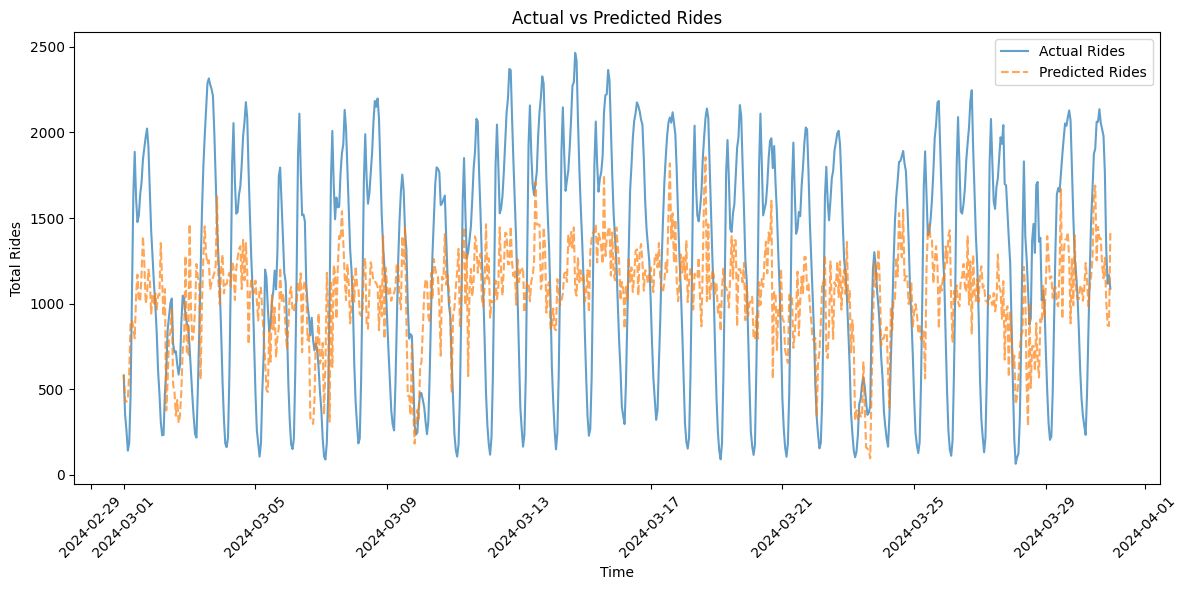

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_data['time_id'], y_test, label='Actual Rides', marker='', linestyle='-', alpha=0.7)
plt.plot(test_data['time_id'], y_pred, label='Predicted Rides', marker='', linestyle='--', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Rides')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred_dl = model.predict(X_test_scaled).flatten()

mae_dl = mean_absolute_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))

(mae_dl, rmse_dl)


c:\Users\12916\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(535.6957730623545, 610.8339463021094)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Support Vector Regressor
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate both models
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Combine results
{
    "Gradient Boosting": {"MAE": mae_gbr, "RMSE": rmse_gbr},
    "SVR": {"MAE": mae_svr, "RMSE": rmse_svr}
}


{'Gradient Boosting': {'MAE': 530.7257378222891, 'RMSE': 606.4488057884419},
 'SVR': {'MAE': 540.6578523413701, 'RMSE': 617.8155360131996}}

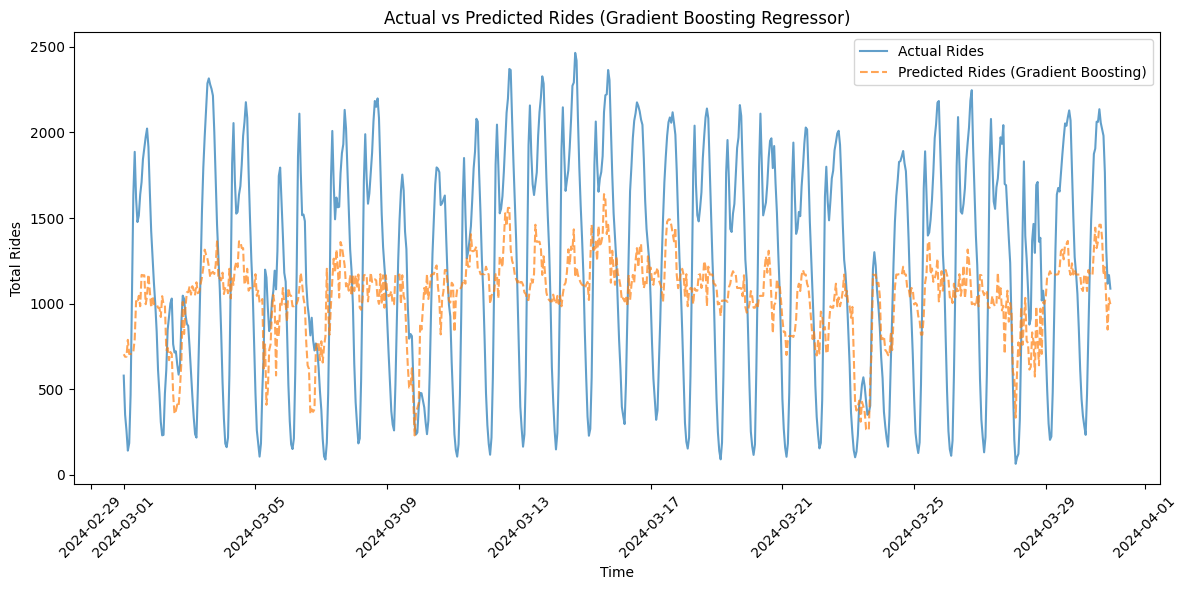

In [29]:
# Plot actual vs predicted values for Gradient Boosting Regressor
plt.figure(figsize=(12, 6))
plt.plot(test_data['time_id'], y_test, label='Actual Rides', marker='', linestyle='-', alpha=0.7)
plt.plot(test_data['time_id'], y_pred_gbr, label='Predicted Rides (Gradient Boosting)', marker='', linestyle='--', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Rides (Gradient Boosting Regressor)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
